In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data")

In [3]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df["MEDV"] = df["MEDV"]* 1000

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

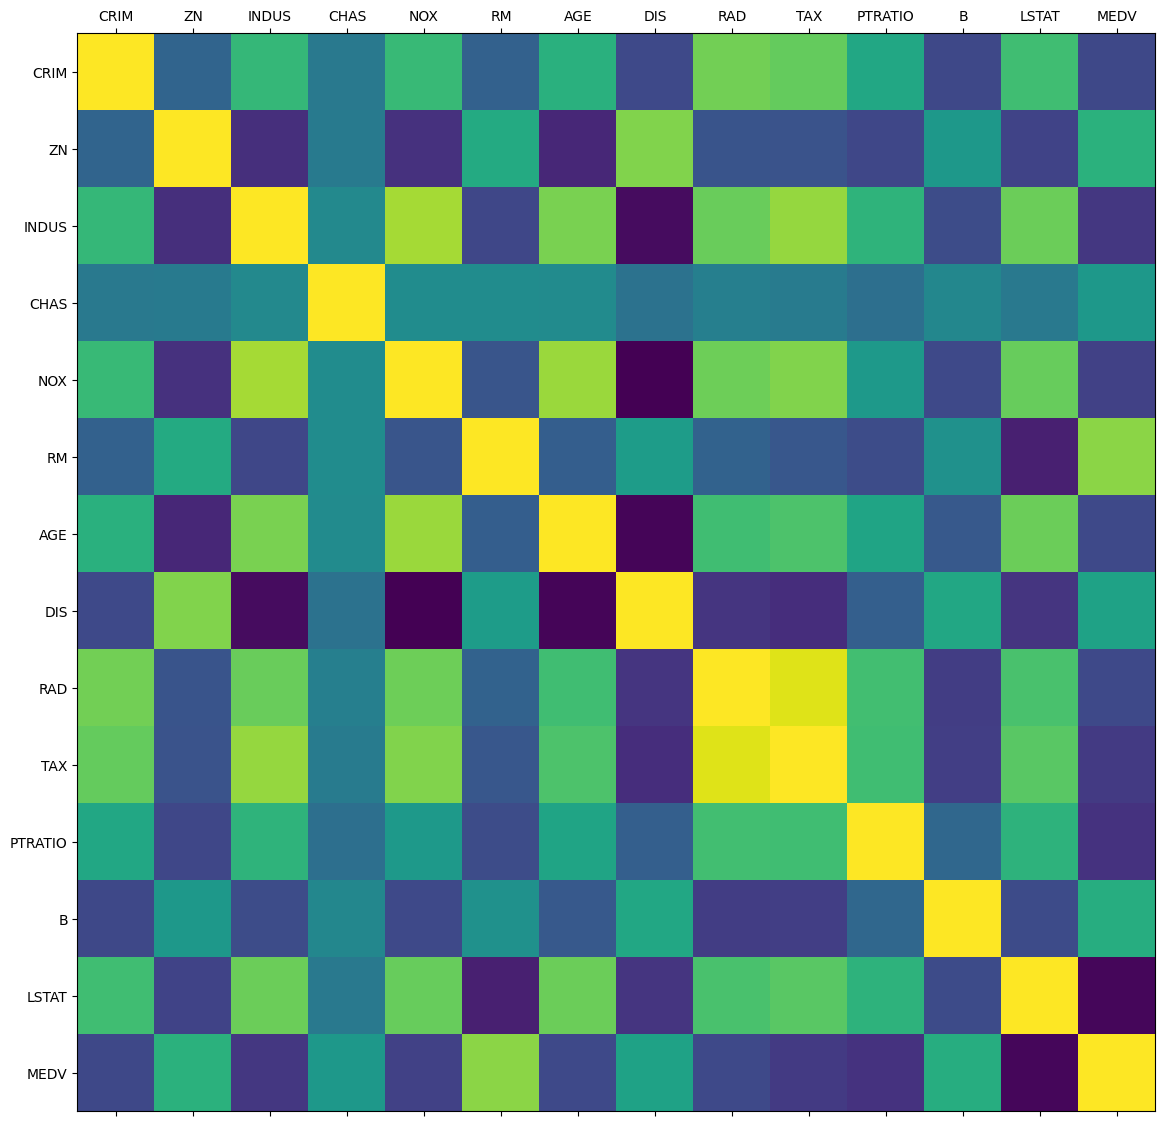

In [6]:
#Check correlation between variables

def plot_corr(df, plt, size):
    
    corr = df.corr()
    fig, axs = plt.subplots(figsize=(size, size))
    axs.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df, plt, 14)

<Axes: title={'center': 'Box Plot of Median Housing costs'}>

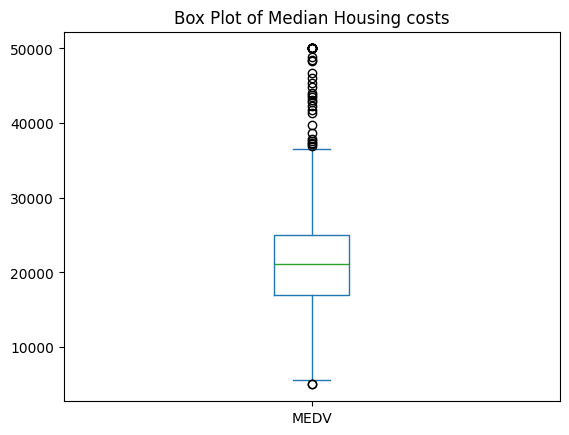

In [7]:
df["MEDV"].plot(kind="box", title="Box Plot of Median Housing costs")

In [8]:
x, y = df.drop(["MEDV"], axis=1), df["MEDV"]
test_size = 0.3

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=test_size, random_state=42)

In [10]:
y_train

array([28700., 21200., 19300., 23100., 19100., 25000., 33400.,  5000.,
       29600., 18700., 21700., 23100., 22800., 21000., 48800., 14600.,
       16600., 27100., 20100., 19800., 21000., 41300., 23200., 20400.,
       18500., 29400., 36400., 24400., 11800., 13800., 12300., 17800.,
       33100., 26700., 13400., 14400., 50000., 22000., 19900., 23800.,
       17500., 12700.,  5600., 31100., 26200., 19400., 16700., 13800.,
       22900., 15300., 27500., 36100., 22900., 24500., 25000., 50000.,
       34900., 31700., 24100., 22100., 14100., 42800., 19300., 32200.,
       26400., 21800., 21700.,  8300., 46700., 43100., 31500., 10500.,
       16700., 20000., 33300., 17800., 50000., 20500., 23200., 13100.,
       19600., 22800., 28700., 30700., 22900., 21900., 23900., 32700.,
       24300., 21500., 24600.,  8500., 26400., 23100., 15000.,  8800.,
       19300., 23900., 24700., 19800., 23800., 13300., 29000., 27100.,
       34600., 13300., 15600., 12500., 14600., 11000., 24800., 17300.,
      

In [11]:
#Use Linear Model to predict Median Housing prices given other columns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [12]:
y_hat_train = reg.predict(x_train).tolist()
y_hat_test = reg.predict(x_test).tolist()

In [14]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print("MSE Train: {0}".format(mse_train))
print("MSE Test: {0}".format(mse_test))

MSE Train: 22545481.487421423
MSE Test: 21517444.23117703
